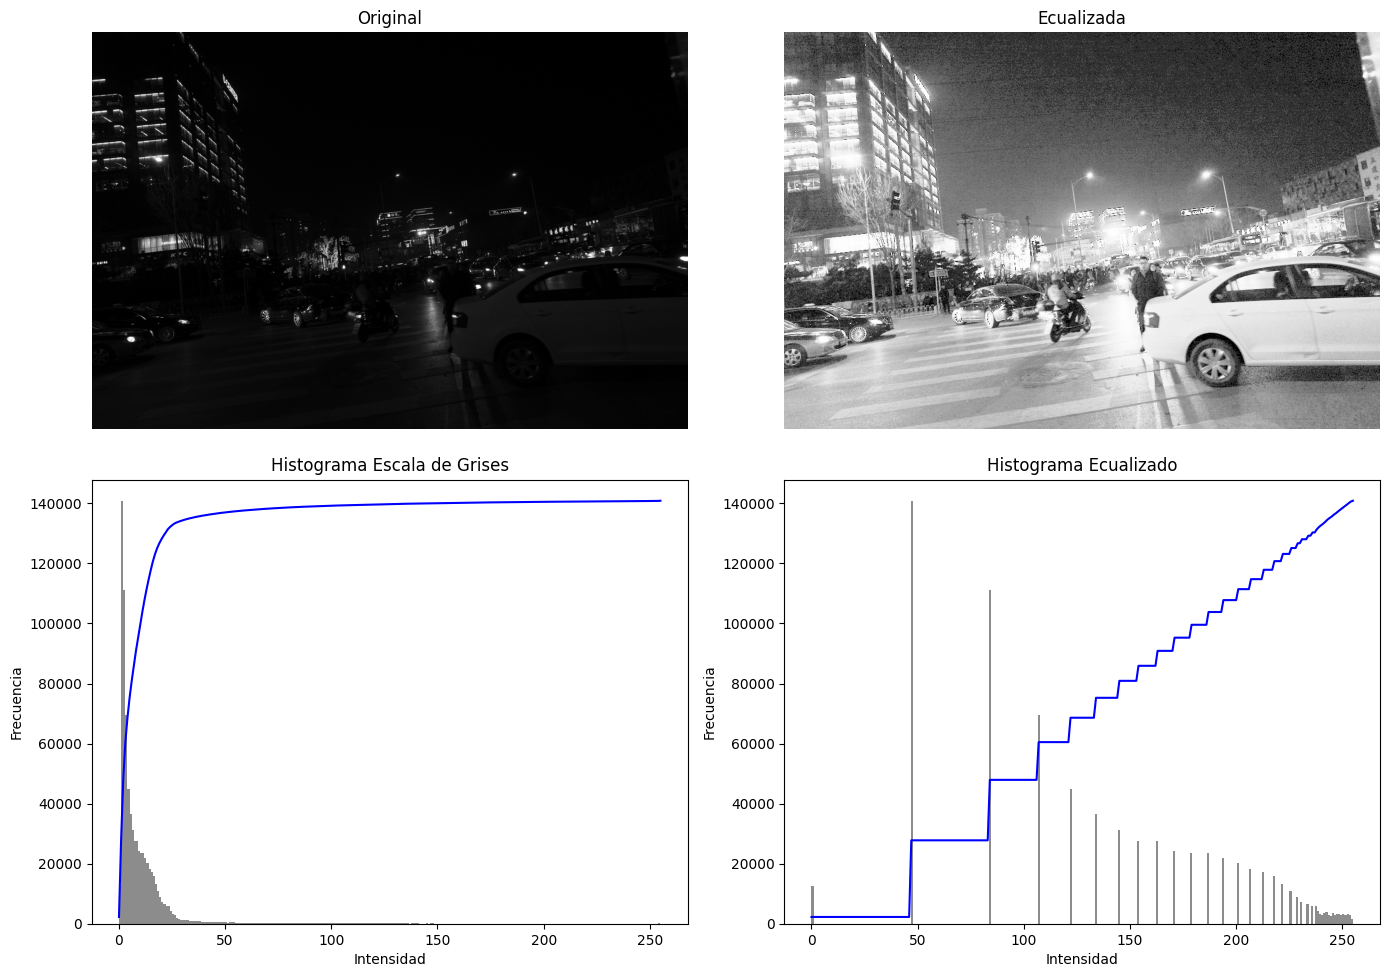

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen nocturna
gray_img = cv2.imread('Imagen3_original.png', cv2.IMREAD_GRAYSCALE)


# Aplicar ecualización del histograma
equalized_image = cv2.equalizeHist(gray_img)

hist_o,bins_o = np.histogram(gray_img.flatten(),256,[0,256])

cdf_o = hist_o.cumsum()
cdf_normalized_o = cdf_o * float(hist_o.max()) / cdf_o.max()

hist_e,bins_e = np.histogram(equalized_image.flatten(),256,[0,256])

cdf_e = hist_e.cumsum()
cdf_normalized_e = cdf_e * float(hist_e.max()) / cdf_e.max()

# Configurar la figura y tamaño
plt.figure(figsize=(14, 10))

# Imagen original
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # Eliminar ejes

# Imagen ecualizada
plt.subplot(2, 2, 2)
plt.title("Ecualizada")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')  # Eliminar ejes

# Aplanamos matriz original
vector_g = gray_img.flatten()

# Histograma de la imagen original
plt.subplot(2, 2, 3)
plt.plot(cdf_normalized_o, color = 'b')
plt.hist(vector_g, bins=256, color='gray', alpha=0.9)
plt.title("Histograma Escala de Grises")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Histograma de la imagen ecualizada
vector_e = equalized_image.flatten()
plt.subplot(2, 2, 4)
plt.plot(cdf_normalized_e, color = 'b')
plt.hist(vector_e, bins=256, color='gray', alpha=0.9)
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Ajustar los espacios entre subplots
plt.tight_layout()
plt.show()
cv2.imwrite("imagen3_equalizated.png", equalized_image)


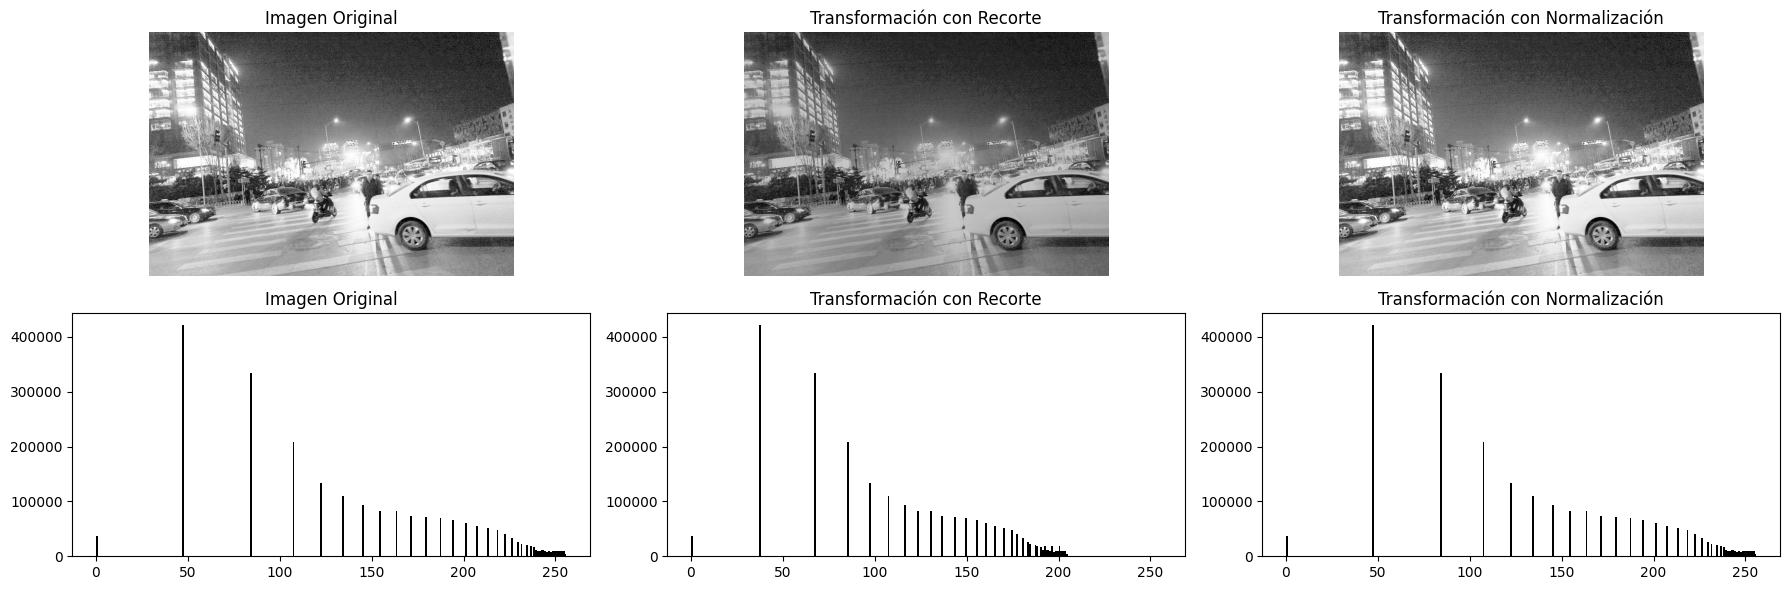

Pixel Imagen Original: 171
Pixel Imagen con Recorte: 136
Pixel Imagen con Normalización: 171


In [3]:
image = cv2.imread("imagen3_equalizated.png", cv2.IMREAD_UNCHANGED)
# Verificar si la imagen es en escala de grises o color
if len(image.shape) == 2:  # Solo tiene ancho y alto, es escala de grises
    is_grayscale = True
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convertir a RGB para visualización
else:
    is_grayscale = False
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para visualización

# Definir el factor de escala
factor = 0.8  # Cambia este valor para aumentar o disminuir el brillo (Ejemplo: 0.8 para reducir)

# 1. Transformación con recorte (np.clip)
if is_grayscale:
    image_clipped = np.clip(image * factor, 0, 255).astype(np.uint8)
    clipped_rgb = cv2.cvtColor(image_clipped, cv2.COLOR_GRAY2RGB)  # Para visualizar
else:
    image_clipped = np.clip(image * factor, 0, 255).astype(np.uint8)
    clipped_rgb = cv2.cvtColor(image_clipped, cv2.COLOR_BGR2RGB)

# 2. Transformación con normalización
if is_grayscale:
    normalized = ((image * factor - np.min(image * factor)) / (np.max(image * factor) - np.min(image * factor)) * 255).astype(np.uint8)
    normalized_rgb = cv2.cvtColor(normalized, cv2.COLOR_GRAY2RGB)  # Para visualizar
else:
    normalized = ((image * factor - np.min(image * factor)) / (np.max(image * factor) - np.min(image * factor)) * 255).astype(np.uint8)
    normalized_rgb = cv2.cvtColor(normalized, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes lado a lado
plt.figure(figsize=(18, 6))

# Imagen original
plt.subplot(2, 3, 1)
plt.title("Imagen Original")
plt.imshow(image_rgb)
plt.axis("off")

# Imagen con recorte
plt.subplot(2, 3, 2)
plt.title("Transformación con Recorte")
plt.imshow(clipped_rgb)
plt.axis("off");
cv2.imwrite("imagen3_multi_recorte.png", clipped_rgb)

# Imagen con normalización
plt.subplot(2, 3, 3)
plt.title("Transformación con Normalización")
cv2.imwrite("imagen3_multi_normalizada.png", clipped_rgb)
plt.imshow(normalized_rgb)
plt.axis("off")

# Imagen original
plt.subplot(2, 3, 4)
plt.title("Imagen Original")
plt.hist(image_rgb.ravel(), bins=256, range=(0, 256), color='black')

# Imagen con recorte
plt.subplot(2, 3, 5)
plt.title("Transformación con Recorte")
plt.hist(clipped_rgb.ravel(), bins=256, range=(0, 256), color='black')
cv2.imwrite("1010_multi.png", clipped_rgb)
# Imagen con normalización
plt.subplot(2, 3, 6)
plt.title("Transformación con Normalización")
plt.hist(normalized_rgb.ravel(), bins=256, range=(0, 256), color='black')

plt.tight_layout()
plt.show()

#pintar mismo pixel en las 3 imagenes
fila, columna = 400, 700
print(f'Pixel Imagen Original: {image[fila, columna]}')
print(f'Pixel Imagen con Recorte: {image_clipped[fila, columna]}')
print(f'Pixel Imagen con Normalización: {normalized[fila, columna]}')

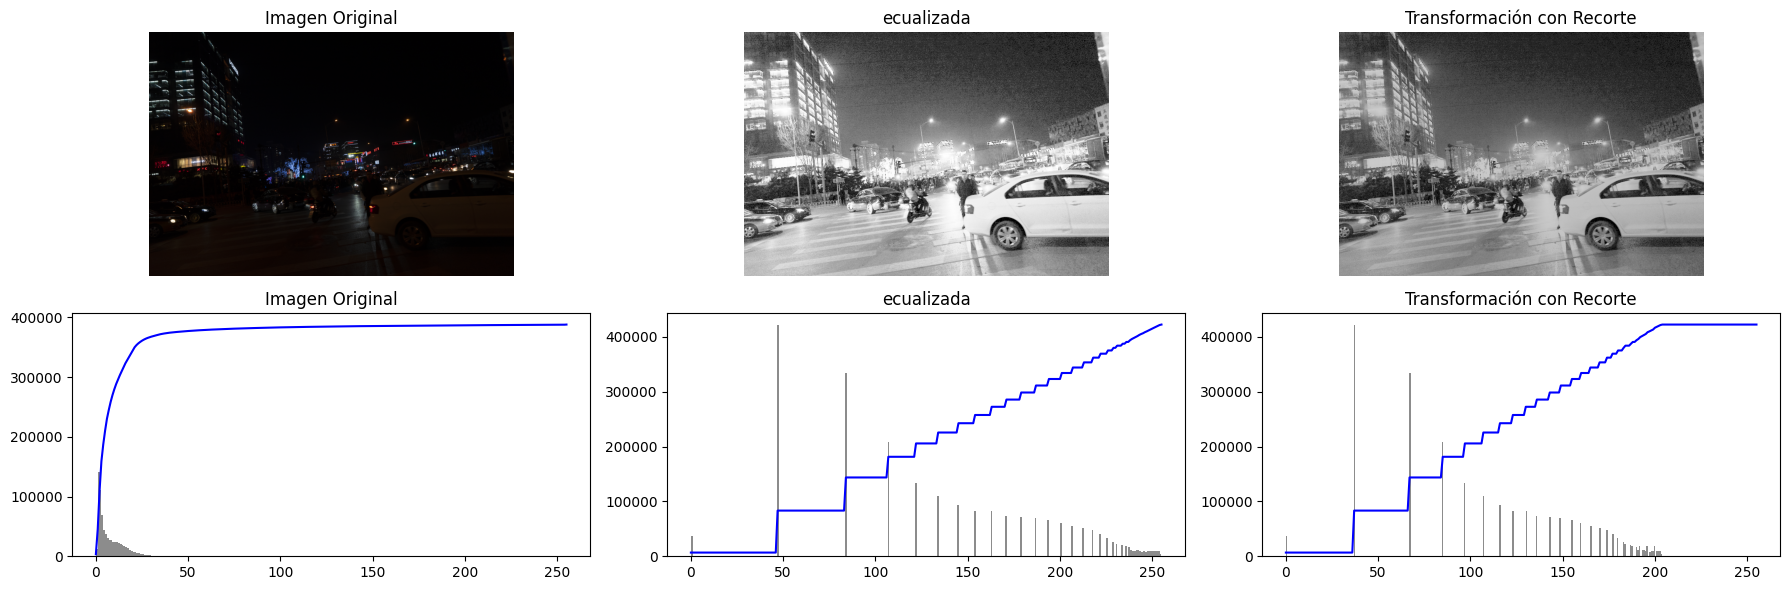

In [5]:
image = cv2.imread("Imagen3_original.png", cv2.IMREAD_COLOR_RGB)
image_eq = cv2.imread("imagen3_equalizated.png", cv2.IMREAD_COLOR_RGB)
image_multi = cv2.imread("imagen3_multi_recorte.png", cv2.IMREAD_COLOR_RGB)

#Original
hist_o,bins_o = np.histogram(image.flatten(),256,[0,256])

cdf_o = hist_o.cumsum()
cdf_normalized_o = cdf_o * float(hist_o.max()) / cdf_o.max()
# Aplanamos matriz original
vector_o = image.flatten()

#Equalized
# Aplanamos matriz original
vector_eq = image_eq.flatten()

hist_eq,bins_eq = np.histogram(image_eq.flatten(),256,[0,256])

cdf_eq = hist_eq.cumsum()
cdf_normalized_eq = cdf_eq * float(hist_eq.max()) / cdf_eq.max()

#Multi
# Aplanamos matriz original
vector_mul = image_multi.flatten()

hist_mul,bins_mul = np.histogram(image_multi.flatten(),256,[0,256])

cdf_mul = hist_mul.cumsum()
cdf_normalized_mul = cdf_mul * float(hist_mul.max()) / cdf_mul.max()


# Mostrar las imágenes lado a lado
plt.figure(figsize=(18, 6))

# Imagen original
plt.subplot(2, 3, 1)
plt.title("Imagen Original")
plt.imshow(image)
plt.axis("off")

# Imagen con recorte
plt.subplot(2, 3, 2)
plt.title("ecualizada")
plt.imshow(image_eq)
plt.axis("off");
cv2.imwrite("imagen3_multi_recorte.png", clipped_rgb)

# Imagen con normalización
plt.subplot(2, 3, 3)
plt.title("Transformación con Recorte")
plt.imshow(image_multi)
plt.axis("off")

# Imagen original
plt.subplot(2, 3, 4)
plt.title("Imagen Original")
plt.plot(cdf_normalized_o, color = 'b')
plt.hist(vector_g, bins=256, color='gray', alpha=0.9)

# Imagen con recorte
plt.subplot(2, 3, 5)
plt.title("ecualizada")
plt.plot(cdf_normalized_eq, color = 'b')
plt.hist(vector_eq, bins=256, color='gray', alpha=0.9)

# Imagen con normalización
plt.subplot(2, 3, 6)
plt.title("Transformación con Recorte")
plt.plot(cdf_normalized_mul, color = 'b')
plt.hist(vector_mul, bins=256, color='gray', alpha=0.9)

plt.tight_layout()
plt.show()


#4
plt.figure()
plt.plot(cdf_normalized_o, color = 'b')
plt.hist(vector_g, bins=256, color='gray', alpha=0.9)
plt.title("Histograma original")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma3_original.png")
plt.close()

#5
plt.figure()
plt.plot(cdf_normalized_eq, color = 'b')
plt.hist(vector_eq, bins=256, color='gray', alpha=0.9)
plt.title("Histograma Ecualizada")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma3_equalizada.png")
plt.close()

#6
plt.figure()
plt.plot(cdf_normalized_mul, color = 'b')
plt.hist(vector_mul, bins=256, color='gray', alpha=0.9)
plt.title("Histograma Multiplicado, factor = 0.8, con recorte")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma3_Mult.png")
plt.close()